<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.8/546.8 kB 8.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Mounted at /content/drive


Run date time (IST): 2025-04-05 16:53:11
-------------------
qualified stocks: 90
with latest results: 84
still star stocks: 46
-------------------
Initial Investment:  1.09 C
CY Investment:  1.36 C
Reserve:  0.00
Current:  1.13 C
-------------------
Today PnL: -2.81 L (-2.44%)
Current PnL: -23.57 L (-17.33%)
CY Booked + Current PnL: -23.57 L (-17.33%)
-------------------
Total profit:  2.98 L
Total loss:  -26.55 L
-------------------
Total Booked + Current PnL: 3.41 L (3.13%)
Total Booked PnL: 26.98 L (24.74%)
Curr Year Booked PnL: 0.00 (0.0%)
Prev Year Booked PnL: 26.98 L (24.74%)
Est FTT:  1.93 C
Est FTT PnL: 80.84 L (71.86%)
-------------------
Est LTT:  2.54 C
Est LTT PnL: 1.42 C (126.19%)
Deployed:  1.09 C
Current:  1.13 C
CAGR/XIRR %: 2.29%
Row successfully appended and saved to data/myPortfolioDB.csv.


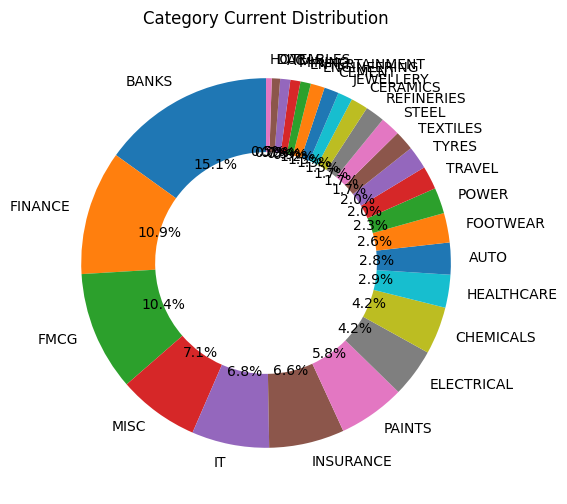

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Conviction', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'CapType', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [4]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.00,-22.31,M-LC,64.44,203374.0,1894.0,25320.0,-1.51,...,12.45,13.51,93.0,0.07,1.81,11.42,XY25,NTT,LC,BANKS
55,NMDC,65.62,82.00,32.73,M-MC,68.89,99481.0,-918.0,25984.0,-7.68,...,26.12,24.96,507.0,-0.04,0.88,12.12,XY25,NTT,MC,MINING
12,AXISBANK,1003.18,1317.30,-20.53,H-LC,76.67,133139.0,10751.0,27573.0,0.13,...,20.71,31.31,NaN,0.39,1.18,15.10,X40,ATH,LC,BANKS
2,AAVAS,1815.63,2328.00,-27.14,M-SC,98.89,219575.0,25303.0,29511.0,-2.03,...,13.44,28.22,6.0,0.86,1.95,34.55,XY24,NTT,SC,FINANCE
47,LICI,761.77,983.00,-22.10,H-LC,70.00,129913.0,4983.0,31296.0,-2.84,...,24.09,29.04,202.0,0.16,1.15,8.63,XY25,NTT,LC,INSURANCE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,SAIL,130.64,228.00,70.51,M-MC,47.78,193897.0,-31065.0,198725.0,-5.01,...,102.49,74.53,-18.0,-0.16,1.72,12.58,XY24,BTT,MC,STEEL
62,REPCOHOME,515.07,880.00,-27.19,H-SC,58.89,135698.0,-69300.0,214539.0,-3.75,...,158.10,70.85,-44.0,-0.32,1.21,9.54,XY24,NTT,SC,FINANCE
59,RBLBANK,230.61,388.00,-17.12,M-SC,90.00,178491.0,-55809.0,215724.0,0.17,...,120.86,68.25,-48.0,-0.26,1.59,17.54,XY24,NTT,SC,BANKS
13,BANDHANBNK,214.25,400.00,-34.65,H-SC,44.44,177538.0,-70992.0,286458.0,-2.27,...,161.35,86.70,-29.0,-0.25,1.58,17.45,XY24,NTT,SC,BANKS


In [5]:
# Xceptional allocation
tmp_df = df_portfolio_features[df_portfolio_features['Conviction'].str.startswith('X-', na=False)]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
51,MEDANTA,1022.60,1486.00,7.53,X-MC,38.89,187598.0,32163.0,38270.0,-0.43,...,20.40,45.32,8.0,0.84,1.67,27.65,XY24,NTT,MC,HEALTHCARE
56,PIDILITIND,2482.94,3576.00,-16.79,X-LC,63.33,167736.0,23725.0,39670.0,1.07,...,23.65,44.02,10.0,0.60,1.49,8.81,X40,BTT,LC,CHEMICALS
36,HINDUNILVR,2430.78,2723.00,-21.49,X-LC,45.56,188542.0,-15644.0,40197.0,-0.00,...,21.32,12.02,-3.0,-0.39,1.68,4.08,XY25,NTT,LC,FMCG
53,NESTLEIND,2225.87,2755.00,-18.09,X-LC,50.00,205856.0,3302.0,44856.0,0.73,...,21.79,23.77,NaN,0.07,1.83,5.89,XY25,NTT,LC,FMCG
21,CERA,9059.90,10420.45,-27.45,X-SC,36.67,55114.0,-35485.0,49090.0,-3.41,...,89.07,15.02,-57.0,-0.72,0.49,8.44,X40N,ATH,SC,CERAMICS
26,DMART,3499.95,5112.00,-21.65,X-LC,96.67,189875.0,25377.0,50393.0,-2.84,...,26.54,46.06,33.0,0.50,1.69,18.68,AR,NTT,LC,FMCG
61,RELIANCE,1288.53,1526.00,-10.67,X-LC,43.33,190343.0,-13245.0,50764.0,-3.52,...,26.67,18.43,67.0,-0.26,1.69,3.68,XY25,NTT,LC,REFINERIES
33,HAVELLS,1571.40,2077.12,-6.82,X-LC,46.67,126356.0,-8784.0,52273.0,-3.26,...,41.37,32.18,NaN,-0.17,1.12,4.42,X40,ATH,LC,ELECTRICAL
79,TATAELXSI,7332.28,9000.00,-34.63,X-MC,12.22,70793.0,-31859.0,55204.0,-2.65,...,77.98,22.74,-10.0,-0.58,0.63,0.00,X40N,NTT,MC,IT
17,BRITANNIA,4905.19,6446.05,1.94,X-LC,77.78,200936.0,4728.0,56905.0,-0.99,...,28.32,31.41,239.0,0.08,1.79,9.80,AR,ATH,LC,FMCG


In [6]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
70,SBIN,760.30,863.0,-22.31,M-LC,64.44,203374.0,1894.0,25320.0,-1.51,...,12.45,13.51,93.0,0.07,1.81,11.42,XY25,NTT,LC,BANKS
55,NMDC,65.62,82.0,32.73,M-MC,68.89,99481.0,-918.0,25984.0,-7.68,...,26.12,24.96,507.0,-0.04,0.88,12.12,XY25,NTT,MC,MINING
2,AAVAS,1815.63,2328.0,-27.14,M-SC,98.89,219575.0,25303.0,29511.0,-2.03,...,13.44,28.22,6.0,0.86,1.95,34.55,XY24,NTT,SC,FINANCE
47,LICI,761.77,983.0,-22.10,H-LC,70.00,129913.0,4983.0,31296.0,-2.84,...,24.09,29.04,202.0,0.16,1.15,8.63,XY25,NTT,LC,INSURANCE
51,MEDANTA,1022.60,1486.0,7.53,X-MC,38.89,187598.0,32163.0,38270.0,-0.43,...,20.40,45.32,8.0,0.84,1.67,27.65,XY24,NTT,MC,HEALTHCARE
36,HINDUNILVR,2430.78,2723.0,-21.49,X-LC,45.56,188542.0,-15644.0,40197.0,-0.00,...,21.32,12.02,-3.0,-0.39,1.68,4.08,XY25,NTT,LC,FMCG
53,NESTLEIND,2225.87,2755.0,-18.09,X-LC,50.00,205856.0,3302.0,44856.0,0.73,...,21.79,23.77,NaN,0.07,1.83,5.89,XY25,NTT,LC,FMCG
86,UNIONBANK,123.87,163.0,-13.51,M-LC,72.22,138839.0,-2001.0,46497.0,-6.99,...,33.49,31.59,-39.0,-0.04,1.23,20.60,XY24,NTT,LC,BANKS
61,RELIANCE,1288.53,1526.0,-10.67,X-LC,43.33,190343.0,-13245.0,50764.0,-3.52,...,26.67,18.43,67.0,-0.26,1.69,3.68,XY25,NTT,LC,REFINERIES
16,BERGEPAINT,558.54,680.0,-25.89,H-MC,57.78,162320.0,-14737.0,53241.0,0.15,...,32.80,21.75,-14.0,-0.28,1.44,16.11,XY24,NTT,MC,PAINTS


In [7]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Conviction,RSP,Current,Current P/L,FTT Amt,Today P/L%,...,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,CapType,Category
69,SBILIFE,1496.49,1924.99,-14.36,H-LC,75.56,127058.0,1353.0,34636.0,-1.92,...,27.26,28.63,NaN,0.04,1.13,13.19,AR,ATH,LC,INSURANCE
50,MASFIN,326.60,399.50,-31.56,H-SC,78.89,76530.0,-21450.0,43324.0,-0.29,...,56.61,22.32,-74.0,-0.50,0.68,11.00,XR,ATH,SC,FINANCE
20,CAMS,3643.00,5250.99,-7.28,H-SC,95.56,103132.0,1128.0,43893.0,-3.66,...,42.56,44.14,261.0,0.03,0.92,24.61,XR,ATH,SC,MISC
26,DMART,3499.95,5112.00,-21.65,X-LC,96.67,189875.0,25377.0,50393.0,-2.84,...,26.54,46.06,33.0,0.50,1.69,18.68,AR,NTT,LC,FMCG
83,TRIDENT,37.35,48.00,40.53,M-SC,41.11,65529.0,-26726.0,53033.0,-2.43,...,80.93,28.51,-16.0,-0.50,0.58,10.45,XR,NTT,SC,TEXTILES
17,BRITANNIA,4905.19,6446.05,1.94,X-LC,77.78,200936.0,4728.0,56905.0,-0.99,...,28.32,31.41,239.0,0.08,1.79,9.80,AR,ATH,LC,FMCG
39,INDUSINDBK,1354.50,1800.00,-47.82,H-MC,1.11,38874.0,-38332.0,63726.0,-3.86,...,163.93,32.89,-21.0,-0.60,0.35,7.06,XR,NTT,MC,BANKS
46,LAOPALA,369.40,464.00,-29.08,H-SC,56.67,59787.0,-41059.0,66884.0,-3.27,...,111.87,25.61,-50.0,-0.61,0.53,7.83,AR,NTT,SC,CERAMICS
25,DEN,52.79,75.00,-40.00,L-SC,40.00,50432.0,-34032.0,69566.0,-4.02,...,137.94,42.07,-21.0,-0.49,0.45,4.16,AR,NTT,SC,ENTERTAINMENT
14,BANKINDIA,112.90,190.00,-29.33,M-MC,94.44,99003.0,-1252.0,69718.0,-2.98,...,70.42,68.29,-12.0,-0.02,0.88,23.40,XR,NTT,MC,BANKS


In [8]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.94
1,20,36.11
2,30,49.33


In [9]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,41.80
X40,14.66
AR,11.93
X40N,11.27
XY25,9.04
XR,8.99
SR,1.20
X200,1.10


In [10]:
# conviction-wise allocation
df_portfolio_features.groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
X-LC,21.95
M-SC,19.64
H-SC,18.41
M-MC,7.68
M-LC,6.62
H-MC,6.35
X-MC,6.29
H-LC,6.20
X-SC,2.70


In [11]:
# criteria-conviction-wise allocation
df_portfolio_features.groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          11.34
X40       X-LC           9.90
XY24      H-SC           8.80
          H-MC           6.00
          M-MC           5.26
XY25      X-LC           5.20
X40N      H-SC           4.99
XY24      M-LC           4.81
AR        X-LC           4.58
X40N      M-SC           3.53
XR        H-SC           3.20
X40       H-LC           2.79
XR        M-SC           2.78
AR        H-LC           2.26
          X-MC           2.01
XY25      M-LC           1.81
XY24      X-MC           1.67
X40N      X-MC           1.53
AR        H-SC           1.42
X40N      X-SC           1.22
XY24      X-LC           1.17
XY25      H-LC           1.15
X200      X-LC           1.10
X40       X-MC           1.08
XY24      L-SC           1.00
XR        L-SC           0.95
X40       M-SC           0.89
XR        M-MC           0.88
XY25      M-MC           0.88
XR        X-SC           0.83
AR        M-MC           0.66
SR        X-SC           0.65
AR        M-SC           0.55
SR        M-SC           0.55
AR        L-SC           0.45
XR        H-MC           0.35
Name: CurrAlloc%, dtype: float64

In [12]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,15.08,-11.06,62.36
FINANCE,10.88,-21.00,72.21
FMCG,10.46,-5.66,38.48
MISC,7.09,-29.23,75.98
IT,6.77,-45.92,118.63
INSURANCE,6.58,-0.43,46.97
PAINTS,5.84,-25.11,62.14
ELECTRICAL,4.25,-13.16,62.97
CHEMICALS,4.16,-15.77,92.05


In [13]:
# bucketX stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,78.79,8865215.0,-13.38,-1186398.0,58.75,5208287.0


In [14]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,3404429.0
XR,1226242.0
X40N,1197468.0
AR,1062922.0
X40,671717.0
XY25,218417.0
SR,209346.0
X200,93786.0


In [15]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2295575.0
M-SC,2134091.0
X-LC,937509.0
M-MC,679733.0
X-SC,373229.0
H-MC,360783.0
L-SC,327535.0
X-MC,311966.0
M-LC,311791.0


In [16]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      M-SC          1027137.0
          H-SC          1003280.0
X40N      H-SC           571700.0
XY24      M-MC           481807.0
XR        M-SC           473705.0
X40       X-LC           446686.0
AR        H-SC           405734.0
X40N      M-SC           378283.0
XR        H-SC           314861.0
XY24      H-MC           297057.0
          M-LC           286471.0
AR        X-LC           183340.0
XR        L-SC           171557.0
XY25      X-LC           135817.0
XR        X-SC           132675.0
AR        H-LC           132439.0
X40N      X-MC           129928.0
SR        X-SC           122997.0
X40N      X-SC           117557.0
AR        M-MC           102224.0
          M-SC            95086.0
X200      X-LC            93786.0
XY24      L-SC            86412.0
SR        M-SC            86349.0
X40       H-LC            82265.0
XY24      X-LC            77880.0
AR        X-MC            74533.0
X40       M-SC            73531.0
XR        M-MC            69718.0
AR        L-SC            69566.0
X40       X-MC            69235.0
XR        H-MC            63726.0
XY24      X-MC            38270.0
XY25      H-LC            31296.0
          M-MC            25984.0
          M-LC            25320.0
Name: FTT Amt, dtype: float64

In [17]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,18
X-LC,14
M-MC,7
M-LC,5
H-LC,5
X-MC,5
H-MC,5
X-SC,4
